In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"D:\Dhika Ramadhan Saputra\UMP\Tugas Akhir (TA)\Percobaan project\data_coba.xlsx")
df.head()

,videoWebUrl,submittedVideoUrl,input,cid,createTime,createTimeISO,text,diggCount,likedByAuthor,pinnedByAuthor,repliesToId,replyCommentTotal,uid,uniqueId,avatarThumbnail,mentions,detailedMentions
0,https://www.tiktok.com/@purbayayudhis/video/75...,https://vt.tiktok.com/ZSyNUQbBA/,https://vt.tiktok.com/ZSyNUQbBA/,7550272630949053191,1757934844,2025-09-15T11:14:04.000Z,Bru kli ini sy betah nungguin mentri keuangan ...,61467,True,0.0,NaN,267.0,6747811261705143297,dyta_ysw.92,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[]
1,https://www.tiktok.com/@purbayayudhis/video/75...,https://vt.tiktok.com/ZSyNUQbBA/,https://vt.tiktok.com/ZSyNUQbBA/,7550289769172288273,1757938833,2025-09-15T12:20:33.000Z,kapan ya uang² itu bisa nongkrong juga direken...,33577,False,0.0,NaN,195.0,7215582891073258497,novita_ekayanti,https://p16-common-sign.tiktokcdn-us.com/tos-m...,[],[]
2,https://www.tiktok.com/@purbayayudhis/video/75...,https://vt.tiktok.com/ZSyNUQbBA/,https://vt.tiktok.com/ZSyNUQbBA/,7550279467689411335,1757936434,2025-09-15T11:40:34.000Z,PERASAAN Cuma era Pak prabowo orang2 pada Beta...,6978,False,0.0,NaN,88.0,7473822931497583633,solihasoliha296,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]
3,https://www.tiktok.com/@purbayayudhis/video/75...,https://vt.tiktok.com/ZSyNUQbBA/,https://vt.tiktok.com/ZSyNUQbBA/,7550320850957763349,1757946071,2025-09-15T14:21:11.000Z,@Bagong: Bu Sri adalah ekonom defensif yang me...,2860,False,0.0,NaN,52.0,7044839347992790018,icesinces_,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]
4,https://www.tiktok.com/@purbayayudhis/video/75...,https://vt.tiktok.com/ZSyNUQbBA/,https://vt.tiktok.com/ZSyNUQbBA/,7550306232742839058,1757942668,2025-09-15T13:24:28.000Z,"anjaayyyy,,""uangnya udah nongkrong disana""🤝",110,False,0.0,NaN,0.0,6967526096175449089,brnprsty,https://p16-common-sign.tiktokcdn-us.com/tos-a...,[],[]


In [3]:
!pip install Sastrawi

# ====================================================
# 1️⃣ Import Library
# ====================================================
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# ====================================================
# 2️⃣ Load Dataset
# ====================================================
df = pd.read_excel("data_coba.xlsx")

# Tampilkan jumlah baris dan kolom
print(df.shape)
df.head()

# ====================================================
# 3️⃣ Ambil kolom teks yang akan digunakan
# ====================================================
df = df[["text"]].copy()
df.dropna(subset=["text"], inplace=True)
df.drop_duplicates(subset=["text"], inplace=True)

# ====================================================
# 4️⃣ Case Folding (ubah ke huruf kecil)
# ====================================================
df["clean_text"] = df["text"].str.lower()

# ====================================================
# 5️⃣ Cleaning Teks
# ====================================================
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#', '', text)                # hapus hashtag symbol
    text = re.sub(r'http\S+', '', text)          # hapus URL
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # hapus simbol & emoji
    text = re.sub(r'\s+', ' ', text).strip()     # rapikan spasi
    return text

df["clean_text"] = df["clean_text"].apply(clean_text)

# ====================================================
# 6️⃣ Hapus Stopwords Bahasa Indonesia
# ====================================================
factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

df["clean_text"] = df["clean_text"].apply(remove_stopwords)

# ====================================================
# 7️⃣ Normalisasi Bahasa Gaul / Singkatan
# ====================================================
normalisasi = {
    "gw": "saya", "gue": "saya", "gua": "saya",
    "lu": "kamu", "loe": "kamu", "lo": "kamu",
    "yg": "yang", "gk": "tidak", "ga": "tidak",
    "nggak": "tidak", "tdk": "tidak", "bgt": "banget",
    "dgn": "dengan", "udh": "sudah", "udah": "sudah",
    "aja": "saja", "dr": "dari", "sm": "sama"
}

def normalize_text(text):
    return ' '.join([normalisasi.get(word, word) for word in text.split()])

df["clean_text"] = df["clean_text"].apply(normalize_text)

# ====================================================
# 8️⃣ Simpan hasil preprocessing
# ====================================================
df.to_excel("data_clean.xlsx", index=False)

print("✅ Preprocessing selesai! Hasil disimpan di 'data_clean.xlsx'")
df.head(10)


(100, 17)
✅ Preprocessing selesai! Hasil disimpan di 'data_clean.xlsx'


,text,clean_text
0,Bru kli ini sy betah nungguin mentri keuangan ...,bru kli sy betah nungguin mentri keuangan baha...
1,kapan ya uang² itu bisa nongkrong juga direken...,kapan uang nongkrong direkeningku
2,PERASAAN Cuma era Pak prabowo orang2 pada Beta...,perasaan cuma era pak prabowo orang2 betah kom...
3,@Bagong: Bu Sri adalah ekonom defensif yang me...,bu sri ekonom defensif menekankan fundamental ...
4,"anjaayyyy,,""uangnya udah nongkrong disana""🤝",anjaayyyyuangnya sudah nongkrong disana
5,"Bagus menteri yang sekarang ,,,semoga pak purb...",bagus menteri sekarang semoga pak purbaya seha...
6,"Gini loh klo bahas duit sma rakyat, kasih kita...",gini loh klo bahas duit sma rakyat kasih kabar...
7,pak purbaya ini kayak tipe dosen yg kalo ngeje...,pak purbaya kayak tipe dosen yang kalo ngejela...
8,Nah gini loh kalo menteri keuangan jelasinnya ...,nah gini loh kalo menteri keuangan jelasinnya ...
9,"keren pak Purbaya,, lbh transparan mengenai ke...",keren pak purbaya lbh transparan mengenai keua...


In [4]:
!pip install transformers torch tqdm

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

# Load tokenizer dan model
tokenizer = AutoTokenizer.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")
model = AutoModelForSequenceClassification.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")

# Cek label kelas
labels = ["negative", "neutral", "positive"]


In [6]:
import pandas as pd

# Load dataset hasil preprocessing
df = pd.read_excel("data_clean.xlsx")

# Pastikan kolom teks ada
texts = df["clean_text"].astype(str).tolist()

# Fungsi untuk prediksi
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        label = torch.argmax(probs, dim=1).item()
    return labels[label]

# Tambahkan kolom hasil sentimen
tqdm.pandas()
df["sentiment"] = df["text"].progress_apply(predict_sentiment)


100%|██████████| 100/100 [00:08<00:00, 11.92it/s]


In [7]:
df.to_excel("hasil_sentimen.xlsx", index=False)
print("✅ Selesai! File hasil_sentimen.xlsx sudah dibuat.")


✅ Selesai! File hasil_sentimen.xlsx sudah dibuat.


<Axes: title={'center': 'Distribusi Sentimen'}, xlabel='Sentimen', ylabel='Jumlah'>

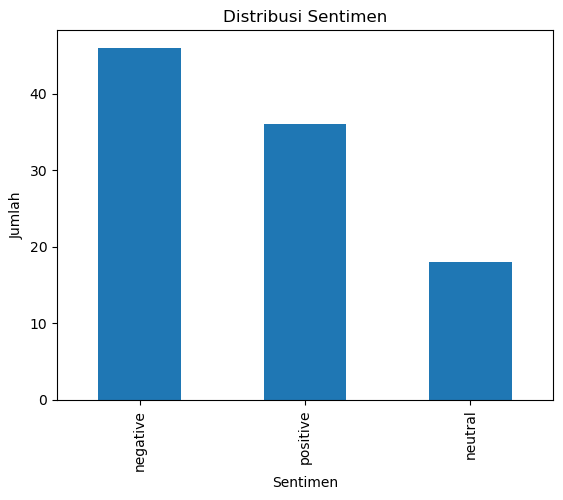

In [8]:
df["sentiment"].value_counts().plot(kind="bar", title="Distribusi Sentimen", xlabel="Sentimen", ylabel="Jumlah")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31940\3606957534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


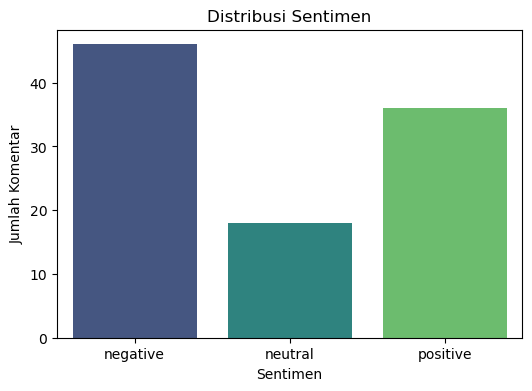

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Komentar')
plt.show()


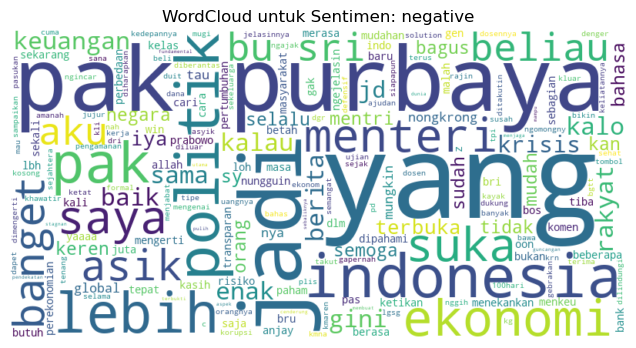

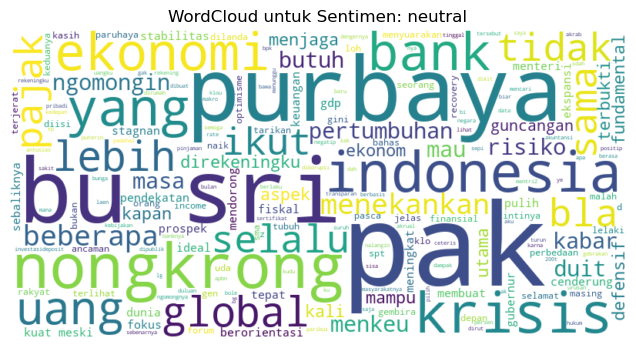

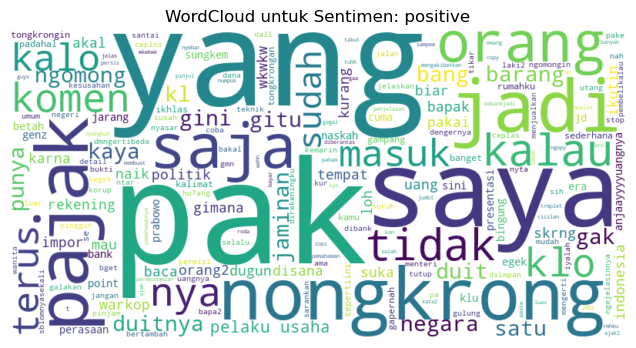

In [10]:
!pip install wordcloud

from wordcloud import WordCloud

for label in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment']==label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Sentimen: {label}')
    plt.show()


In [11]:
for label in df['sentiment'].unique():
    print(f"\n===== Contoh Komentar: {label.upper()} =====")
    sample = df[df['sentiment']==label]['clean_text'].sample(5, random_state=42)
    for i, txt in enumerate(sample, 1):
        print(f"{i}. {txt}")



===== Contoh Komentar: NEGATIVE =====
1. iya jadi asik seru
2. ikut bg
3. keren banget saya yang gak ngerti perbankan jadi paham ternyata gini yaaaa beneran adil kamu bang gak jatuhkan salah satunya
4. kalau dulu mungkin putus asakita mengamati perkembangan politik ttp gitu2 saja g perubahangak didengardiera prabowo bnyak efek kejutrakyat mulai menyaksikan berbagai macam dlm politik sedikit keterbukaan perubahansehingga masyarakat merasa punya harapan belajar mengikuti alur arah politik negeri tercinta
5. ku bagus si ka aku malah suka kalau rakyat indo melek politik anak muda soalnya kan sudah jarang yang nonton tv

===== Contoh Komentar: NEUTRAL =====
1. kapan uang nongkrong direkeningku
2. bu sri ekonom defensif menekankan fundamental aspek utama terbukti beberapa kali mampu menjaga indonesia guncangan krisis global pendekatan membuat pertumbuhan cenderung stagnan ekonomi dunia pulih sebaliknya pak purbaya lebih berorientasi pertumbuhan prospek gdp lebih kuat meski risiko masa krisi

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil stopword Bahasa Indonesia dari Sastrawi
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()

# Fungsi untuk LDA per sentimen
def tampilkan_topik(sentiment_label, n_topics=3, n_words=7):
    subset = df[df['sentiment'] == sentiment_label]['clean_text']
    
    # Jika tidak ada data untuk sentimen tertentu, skip
    if subset.empty:
        print(f"\n⚠️ Tidak ada data untuk sentimen: {sentiment_label}")
        return
    
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
    X = vectorizer.fit_transform(subset)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    
    words = np.array(vectorizer.get_feature_names_out())
    
    print(f"\n==== TOPIK untuk Sentimen: {sentiment_label.upper()} ====")
    for i, topic in enumerate(lda.components_):
        top_words = words[topic.argsort()[-n_words:][::-1]]
        print(f"Topik {i+1}: {', '.join(top_words)}")

# Jalankan LDA untuk tiap label
for label in df['sentiment'].unique():
    tampilkan_topik(label)



==== TOPIK untuk Sentimen: NEGATIVE ====
Topik 1: politik, kalau, jd, mungkin, nya, sy, mentri
Topik 2: pak, jadi, purbaya, indonesia, lebih, beliau, asik
Topik 3: suka, pak, baik, berita, gini, iya, semoga

==== TOPIK untuk Sentimen: NEUTRAL ====
Topik 1: uang, pajak, mau, bank, ikut, nongkrong, selalu
Topik 2: pak, sri, bu, purbaya, ekonomi, selalu, bank
Topik 3: sama, pak, nongkrong, menkeu, duit, ikut, bank

==== TOPIK untuk Sentimen: POSITIVE ====
Topik 1: nongkrong, duit, satu, kl, pajak, punya, disana
Topik 2: pak, kalau, klo, nya, jaminan, gitu, orang
Topik 3: jadi, pajak, kalo, masuk, kaya, pak, komen


In [13]:
# Contoh sederhana: tampilkan jumlah topik yang ditemukan per sentimen
# (kalau ingin persentase, butuh hitung distribusi dokumen per topik)
for label in df['sentiment'].unique():
    subset = df[df['sentiment']==label]
    print(f"{label.capitalize()}: {len(subset)} komentar")


Negative: 46 komentar
Neutral: 18 komentar
Positive: 36 komentar


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi untuk tampilkan topik dan distribusi
def tampilkan_topik_dan_distribusi(sentiment_label, n_topics=3, n_words=7):
    subset = df[df['sentiment'] == sentiment_label]['clean_text']
    
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
    X = vectorizer.fit_transform(subset)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    doc_topic_dist = lda.fit_transform(X)  # probabilitas tiap dokumen ke tiap topik
    
    words = np.array(vectorizer.get_feature_names_out())
    
    print(f"\n==== TOPIK untuk Sentimen: {sentiment_label.upper()} ====")
    for i, topic in enumerate(lda.components_):
        top_words = words[topic.argsort()[-n_words:][::-1]]
        print(f"Topik {i+1}: {', '.join(top_words)}")
    
    # Hitung proporsi dokumen per topik
    topic_assignments = np.argmax(doc_topic_dist, axis=1)
    topic_counts = pd.Series(topic_assignments).value_counts(normalize=True) * 100
    
    print("\nDistribusi Topik (%):")
    for topic, pct in topic_counts.sort_index().items():
        print(f"Topik {topic+1}: {pct:.2f}% dokumen dalam kelas {sentiment_label}")

# Jalankan LDA untuk tiap label sentimen
for label in df['sentiment'].unique():
    tampilkan_topik_dan_distribusi(label)



==== TOPIK untuk Sentimen: NEGATIVE ====
Topik 1: purbaya, indonesia, ekonomi, politik, bu, sri, menteri
Topik 2: suka, berita, nya, nongkrong, bagus, menkeu, menteri
Topik 3: iya, rakyat, politik, jd, mentri, sy, enak

Distribusi Topik (%):
Topik 1: 50.00% dokumen dalam kelas negative
Topik 2: 21.74% dokumen dalam kelas negative
Topik 3: 28.26% dokumen dalam kelas negative

==== TOPIK untuk Sentimen: NEUTRAL ====
Topik 1: purbaya, sri, bu, ekonomi, bank, menkeu, pajak
Topik 2: pajak, bu, sri, bank, menkeu, nongkrong, duit
Topik 3: nongkrong, uang, duit, bank, menkeu, pajak, ekonomi

Distribusi Topik (%):
Topik 1: 55.56% dokumen dalam kelas neutral
Topik 2: 11.11% dokumen dalam kelas neutral
Topik 3: 33.33% dokumen dalam kelas neutral

==== TOPIK untuk Sentimen: POSITIVE ====
Topik 1: nongkrong, jaminan, duit, pakai, skrng, disana, baca
Topik 2: pajak, orang, klo, kalo, kaya, ngomong, gini
Topik 3: masuk, nya, kl, komen, akal, up, karna

Distribusi Topik (%):
Topik 1: 44.44% dokumen d

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
d:\Software_instalan2\anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
d:\Software_instalan2\anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
d:\Software_instalan2\anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your p

In [16]:
!pip install bertopic[visualization]

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Buat embedding model (pakai IndoBERT biar pas)
model = SentenceTransformer("indobenchmark/indobert-base-p1")

# Fit model ke teks bersihmu
docs = df['clean_text'].tolist()
topic_model = BERTopic(embedding_model=model)
topics, probs = topic_model.fit_transform(docs)

# Lihat topik teratas
topic_model.get_topic_info()

# (Opsional) Lihat kata-kata penting di Topik 0
topic_model.get_topic(0)


No sentence-transformers model found with name indobenchmark/indobert-base-p1. Creating a new one with mean pooling.


vocab.txt: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

[('yang', 0.08967805007560554),
 ('pak', 0.054040351965308105),
 ('jadi', 0.04542342213813121),
 ('pajak', 0.03790745717011165),
 ('saya', 0.0379002430309569),
 ('indonesia', 0.0379002430309569),
 ('purbaya', 0.03716461811301645),
 ('lebih', 0.035985591327899406),
 ('negara', 0.03528491584030072),
 ('kalo', 0.03415944563815842)]

In [17]:
df['topic'] = topics
pd.crosstab(df['sentiment'], df['topic'], normalize='index') * 100


topic,-1,0,1
sentiment,,,
negative,26.086957,45.652174,28.260870
neutral,50.000000,44.444444,5.555556
positive,33.333333,50.000000,16.666667


In [ ]:
# !pip install -U scikit-learn==1.3.2 hdbscan==0.8.33 umap-learn==0.5.6 bertopic==0.16.0


     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -

  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      C:\Users\LENOVO\AppData\Local\Temp\pip-build-env-x109o9i7\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\LENOVO\AppData\Local\Temp\pip-build-env-x109o9i7\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\LENOVO\AppData\Local\Temp\pip-build-env-x109o9i7\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License 